
# Project: Maternal Health Risk
    

## Objectives

After completing this lab you will be able to:

* 
*
*

# About The Dataset
- The original source of the data is collected from different hospitals, community clinics, maternal health cares from the rural areas of Bangladesh through the IoT based risk monitoring system.
- Link data: https://archive.ics.uci.edu/dataset/863/maternal+health+risk


## Install and import the required libraries


Exectue the following cells to install and import the necessary libraries.


In [ ]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install scikit-learn
%pip install seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

## Load the data


Execute the following cells to load the dataset as a pandas dataframe.


In [10]:
# load
df = pd.read_csv('..\..\Data\Maternal Health Risk Data Set.csv')
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [11]:
# count()
df.count()

Age            1014
SystolicBP     1014
DiastolicBP    1014
BS             1014
BodyTemp       1014
HeartRate      1014
RiskLevel      1014
dtype: int64

### Drop all rows with missing values


In [13]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [14]:
df.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')

## Data Granularity


## Extracting a feature


## Define the feature and target dataframes



In [20]:
X = df.drop(columns='RiskLevel', axis=1)
y = df['RiskLevel']

## How balanced are the classes?

In [15]:
df.value_counts()

Age  SystolicBP  DiastolicBP  BS    BodyTemp  HeartRate  RiskLevel
19   120         80           7.0   98.0      70         mid risk     27
48   120         80           11.0  98.0      88         high risk    14
31   120         60           6.1   98.0      76         mid risk     13
40   160         100          19.0  98.0      77         high risk    10
55   140         95           19.0  98.0      77         high risk    10
                                                                      ..
25   120         90           6.9   98.0      70         low risk      1
                                              80         low risk      1
                              7.5   98.0      80         low risk      1
                 100          6.8   98.0      60         low risk      1
70   85          60           6.9   102.0     70         low risk      1
Name: count, Length: 452, dtype: int64

## What can you conclude from these counts?
- How often ...?
- How accurate would you be if ...?
- Is this a balanced dataset?
- Next steps?


In [19]:
mid = df['RiskLevel'].value_counts().get('mid risk')
high= df['RiskLevel'].value_counts().get('high risk')
low = df['RiskLevel'].value_counts().get('low risk')
print(mid, high, low)

336 272 406


## Split data into training and test sets, ensuring target stratification


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

## Define preprocessing transformers for numerical and categorical features
## Automatically detect numerical and categorical columns and assign them to separate numeric and categorical features

In [25]:
numeric_features = X_train.select_dtypes(include=['number']).columns.tolist()  
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

### Define separate transformers for both feature types and combine them into a single preprocessing transformer


In [26]:
# Scale the numeric features
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
# One-hot encode the categoricals 
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

## Combine the transformers into a single preprocessing column transformer


In [27]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

## Create a pipeline by combining the preprocessing with a Random Forest classifier


In [28]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

### Define a parameter grid to use in a cross validation grid search model optimizer


In [37]:
param_grid = {
    'classifier__solver': ['liblinear'],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__class_weight': [None, 'balanced']
}

### Pipeline usage in crossvalidation
Recall that the pipeline is repeatedly used within the crossvalidation by fitting on each internal training fold and predicting on its corresponding validation fold


## Perform grid search cross-validation and fit the best model to the training data
### Select a cross-validation method, ensuring target stratification during validation


In [31]:
cv = StratifiedKFold(n_splits=5, shuffle=True)

## Instantiate and fit GridSearchCV to the pipeline

In [40]:
grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='f1_macro', verbose=2)  
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=None, classifier__penalty=l2, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=None, classifier__penalty=l2, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=None, classifier__penalty=l2, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=No

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'SystolicBP',
                                                                          'DiastolicBP',
                                                                          'BS',
                                                                          'BodyTemp',
                                                                          'HeartRate']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         [])])),
                                       ('classifier',
                                        LogisticRegression(random_state=42))]),
             param_grid={'classifier__class_weight': [None, 'balanced'],
                         'classifier__penalty': ['l1', 'l2'],
                         'classifier__solver': ['liblinear']},
             scoring='f1_macro', verbose=2)

### Print the best parameters and best crossvalidation score


In [41]:
print("\nBest parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))


Best parameters found:  {'classifier__class_weight': None, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
Best cross-validation score: 0.62


## Display your model's estimated score

In [42]:
test_score = grid_search.score(X_test, y_test)  
print("Test set score: {:.2f}".format(test_score))

Test set score: 0.65


## Get the model predictions from the grid search estimator on the unseen data


In [46]:
y_pred = grid_search.predict(X_test)

## Print the classification report


In [48]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

   high risk       0.83      0.80      0.81        55
    low risk       0.60      0.86      0.71        81
    mid risk       0.62      0.31      0.42        67

    accuracy                           0.67       203
   macro avg       0.68      0.66      0.65       203
weighted avg       0.67      0.67      0.64       203



## Plot the confusion matrix

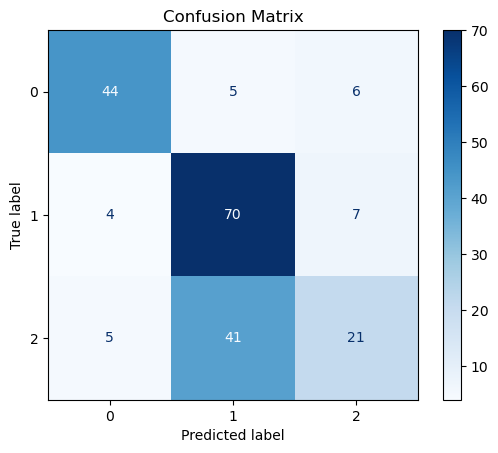

In [50]:
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

## Feature importances
Recall that to obtain the categorical feature importances, we have to work our way backward through the modelling pipeline to associate the feature importances with their original input variables, not the one-hot encoded ones. We don't need to do this for the numeric variables because we didn't modify their names in any way.  
Remember we went from categorical features to one-hot encoded features, using the 'cat' column transformer.
 
Let's get all of the feature importances and associate them with their transformed features


## Extract the feature importances


In [ ]:
# feature_importances = grid_search.best_estimator_['classifier'].feature_importances_
# feature_importances

Now let's extract the feature importances and plot them as a bar graph.


In [ ]:
# # Combine numeric and categorical feature names
# feature_names = numeric_features + list(grid_search.best_estimator_['preprocessor']
#                                         .named_transformers_['cat']
#                                         .named_steps['onehot']
#                                         .get_feature_names_out(categorical_features))

# feature_importances = grid_search.best_estimator_['classifier'].feature_importances_

# importance_df = pd.DataFrame({'Feature': feature_names,
#                               'Importance': feature_importances
#                              }).sort_values(by='Importance', ascending=False)

# N = 20  # Change this number to display more or fewer features
# top_features = importance_df.head(N)

# # Plotting
# plt.figure(figsize=(10, 6))
# plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
# plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature on top
# plt.title(f'Top {N} Most Important Features in predicting whether it will rain today')
# plt.xlabel('Importance Score')
# plt.show()

## Try another model

## Update the pipeline and the parameter grid


In [ ]:
# pipeline.set_params(classifier=LogisticRegression(random_state=42))

# grid_search.estimator = pipeline

# param_grid = {
#     'classifier__solver': ['liblinear'],
#     'classifier__penalty': ['l1', 'l2'],
#     'classifier__class_weight': [None, 'balanced']
# }

# grid_search.param_grid = param_grid

# grid_search.fit(X_train, y_train)

# y_pred = grid_search.predict(X_test)


###  Compare the results to your previous model.
Display the clasification report and the confusion matrix for the new model and compare your results with the previous model.


In [ ]:
# print(classification_report(y_test, y_pred))

# # Generate the confusion matrix 
# conf_matrix = confusion_matrix(y_test, y_pred)

# plt.figure()
# sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')

# # Set the title and labels
# plt.title('Titanic Classification Confusion Matrix')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')

# # Show the plot
# plt.tight_layout()
# plt.show()

What can you conclude about the model performances? 
